<a href="https://colab.research.google.com/github/monikak2004/Netflix-Data/blob/main/Netflix-Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Netflix Data Cleaning, Analysis, and Visualization
# Tools: Python (Pandas, Matplotlib, Seaborn, WordCloud)

# Step 1: Import Libraries
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
df = pd.read_csv('/content/Netflix Data set.csv')  # Update path if needed
df.head()



Saving Netflix Data set.csv to Netflix Data set.csv


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df = pd.read_csv('Netflix Data set.csv')  # Make sure this matches the uploaded filename
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [6]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop rows with missing values in critical columns
df.dropna(subset=['director', 'country'], inplace=True)

# Fill remaining nulls in less critical columns
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Split genre list
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))



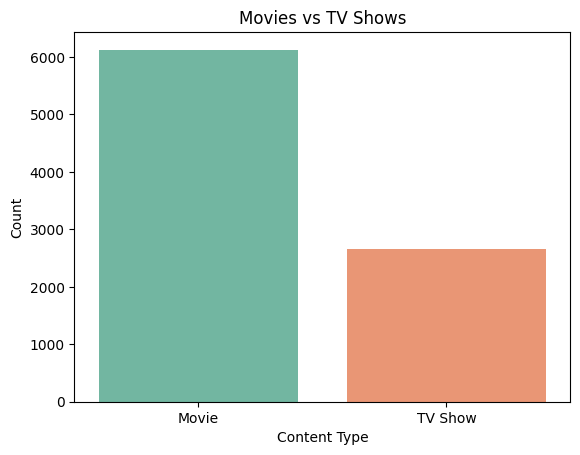

In [7]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


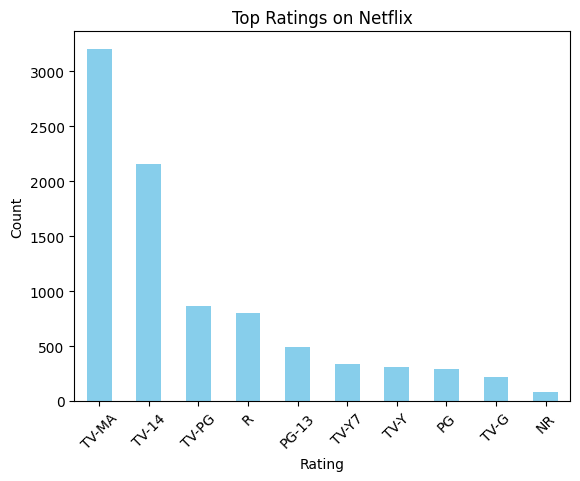

In [8]:
rating_counts = df['rating'].value_counts().head(10)
rating_counts.plot(kind='bar', color='skyblue')
plt.title("Top Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


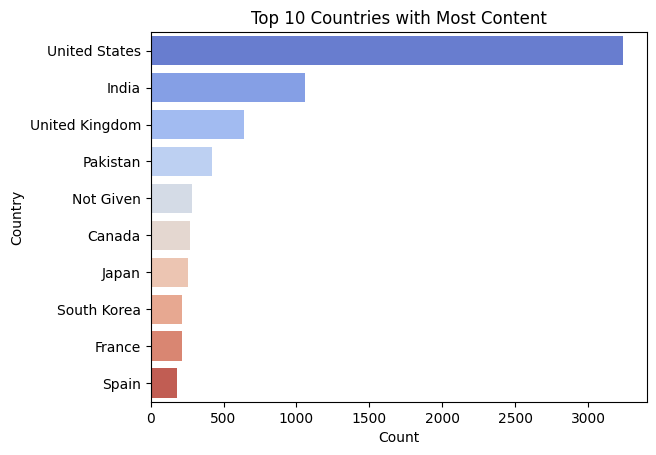

In [9]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


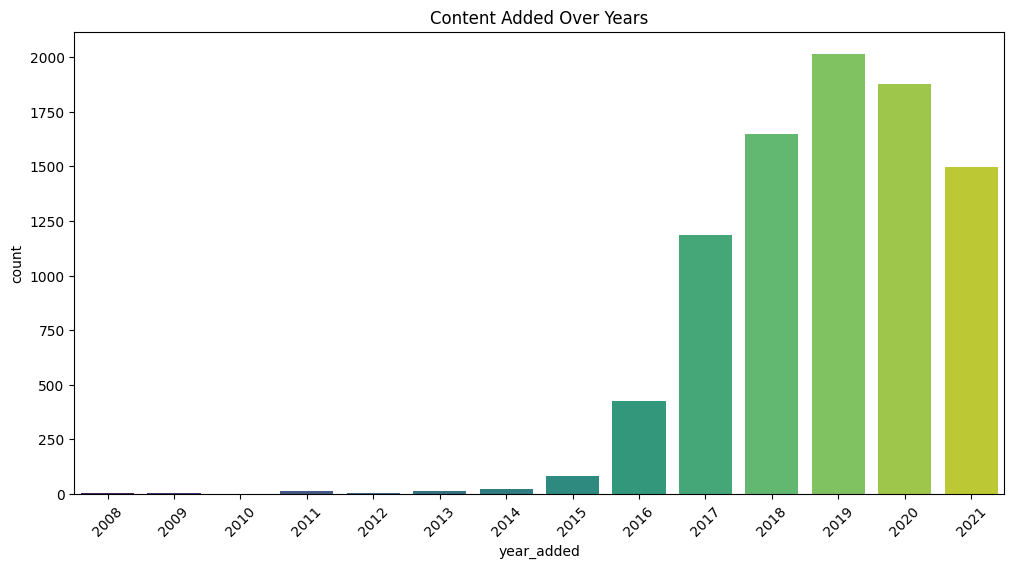

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='year_added', data=df, palette='viridis')
plt.title("Content Added Over Years")
plt.xticks(rotation=45)
plt.show()


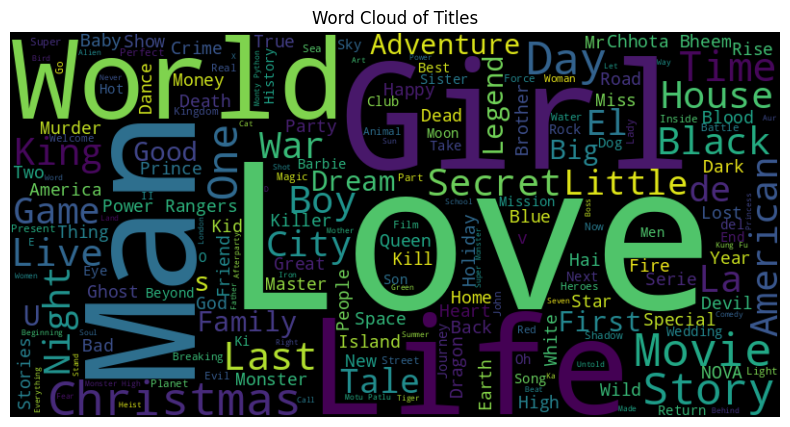

In [11]:
titles = ' '.join(df['title'])
wordcloud = WordCloud(background_color='black', width=800, height=400).generate(titles)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Titles")
plt.show()


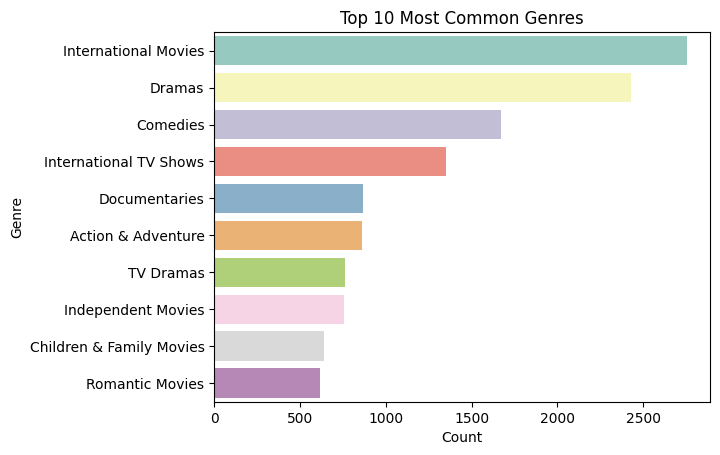

In [14]:
from collections import Counter

all_genres = sum(df['genres'], [])
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(data=top_genres, x='Count', y='Genre', palette='Set3')
plt.title("Top 10 Most Common Genres")
plt.show()


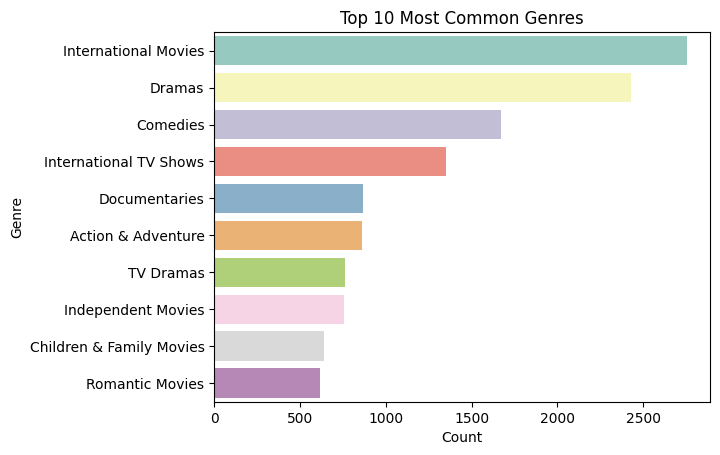

In [15]:
all_genres = sum(df['genres'], [])
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(data=top_genres, x='Count', y='Genre', palette='Set3')
plt.title("Top 10 Most Common Genres")
plt.show()


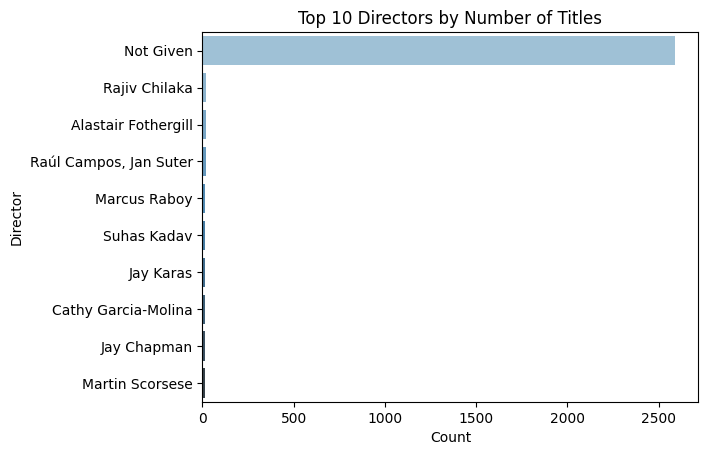

In [16]:
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()


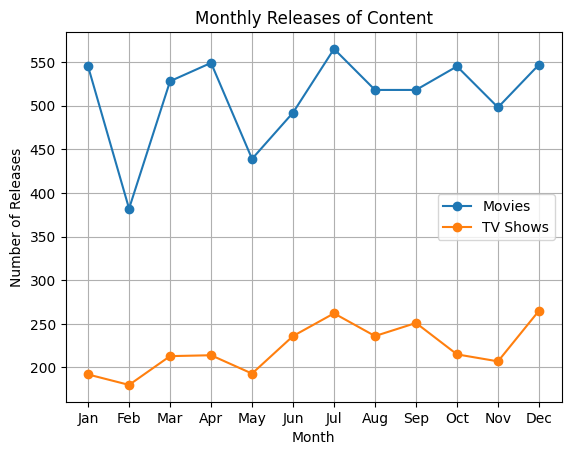

In [17]:
monthly_movies = df[df['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_shows = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.plot(monthly_movies.index, monthly_movies.values, label='Movies', marker='o')
plt.plot(monthly_shows.index, monthly_shows.values, label='TV Shows', marker='o')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Monthly Releases of Content")
plt.legend()
plt.grid(True)
plt.show()



In [20]:
## Summary & Insights
%%markdown
### Summary & Insights
1. ...


1. Netflix has significantly more Movies than TV Shows (~70% vs 30%).
2. TV-MA and TV-14 are the most frequent content ratings.
3. Most content is produced in the USA, followed by India and the UK.
4. Netflix content additions peaked around 2019–2020.
5. Top genres include International Shows, Dramas, Documentaries, and Comedies.
6. Directors like Rajiv Chilaka, Alastair Fothergill, and Mike Flanagan are most active.



### Summary & Insights
1. ...


1. Netflix has significantly more Movies than TV Shows (~70% vs 30%).
2. TV-MA and TV-14 are the most frequent content ratings.
3. Most content is produced in the USA, followed by India and the UK.
4. Netflix content additions peaked around 2019–2020.
5. Top genres include International Shows, Dramas, Documentaries, and Comedies.
6. Directors like Rajiv Chilaka, Alastair Fothergill, and Mike Flanagan are most active.

